In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({'font.size': 10})

**To find significant geometrical aspects to distinguish between malignant and beningn tumours we need to find features in the dataframe that have a significant difference in their median values**

In [2]:
data = pd.read_csv('E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 1\\Cancergeometry.csv')
y = data.diagnosis                       
x = data.drop(['id','diagnosis'],axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [3]:
data_dia = y # labels (M or B) for diagnosis
data = x # features for tumour types
data_n_2 = (data - data.mean()) / (data.std())  # Normalize the values to fit all values in the same plot

# Violin Plot

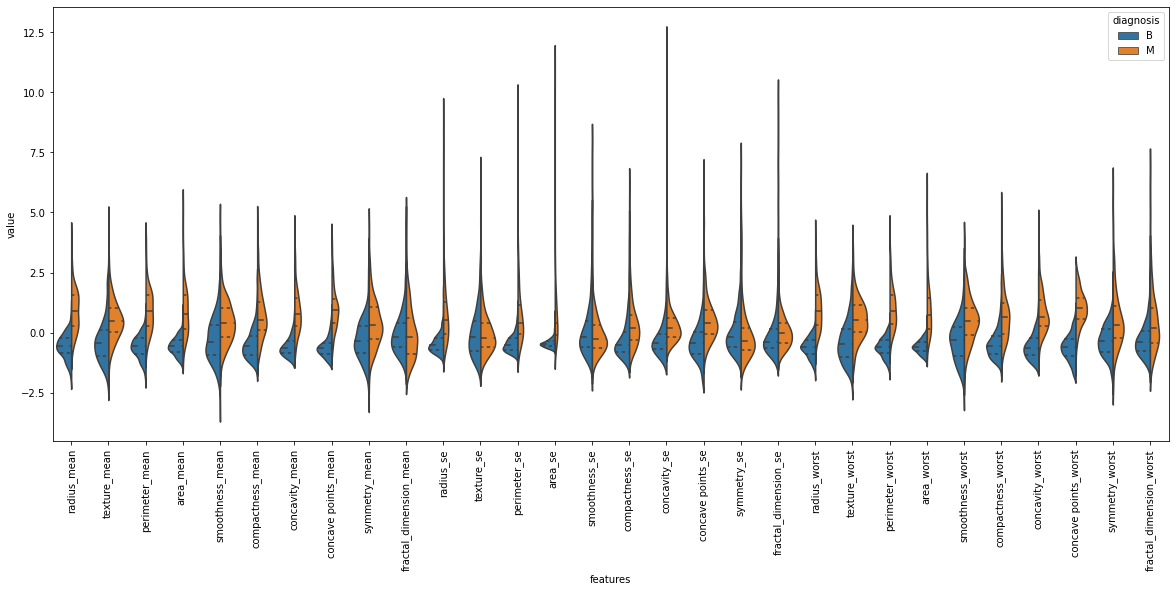

In [4]:
fig, ax = plt.subplots(figsize=(20,8)) # Make a figure and a set of subplots
data = pd.concat([y,data_n_2],axis=1) # Concatenate the dataframes so that the diagnosis column is next to the features
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')  # Melt the data into a long format so that seaborn can make a violin plot
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart") # Make a violin plot
plt.xticks(rotation=90); # Rotate the x-axis labels so that they are easier to read

# Box Plot

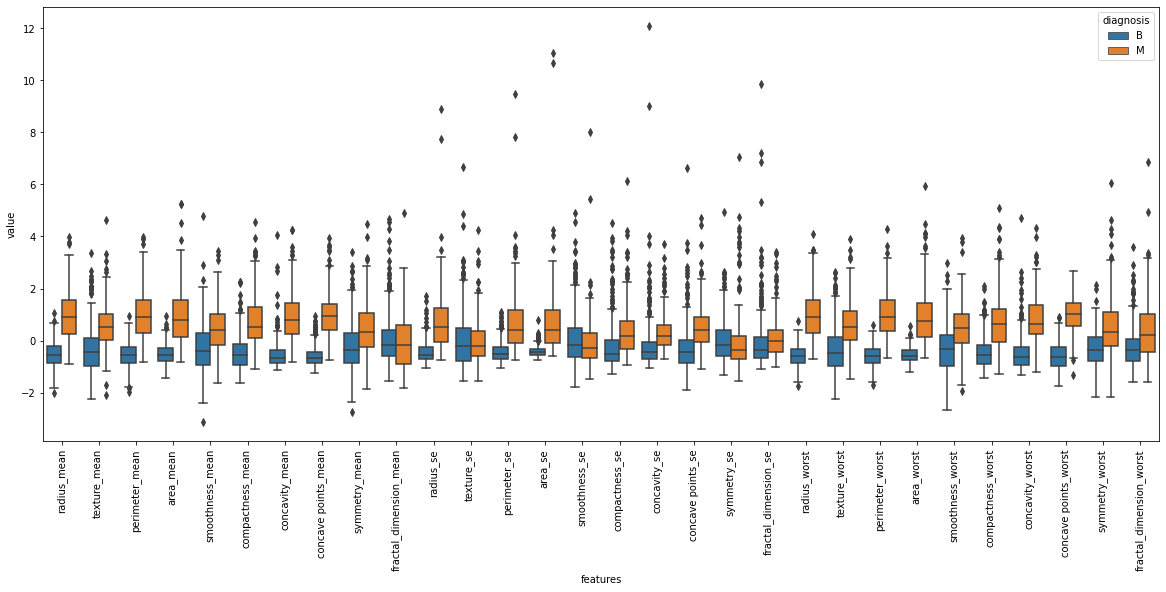

In [5]:
fig, ax = plt.subplots(figsize=(20,8)) # Make a figure and a set of subplots
sns.boxplot(x="features", y="value", hue="diagnosis", data=data) # Make a boxplot
plt.xticks(rotation=90); # Rotate the x-axis labels so that they are easier to read

**The features that have a significant difference in median for B and M labels are:** 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst','smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst','radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean'

# Pair Plot

In [ ]:
sns.pairplot(x)

# Correlation Heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(20,8)) # Make a figure and a set of subplots
corr = x.corr() # Calculate the correlation between the features
matrix = np.triu(corr) # Make a mask for the upper triangle
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,mask=matrix) # Make a heatmap

There is highly significant correlation observed between: 
- 'radius_mean and perimeter_mean',
- 'radius_mean and area_mean',
-  'radius_mean and radius_worst',
-  'radius_mean and perimeter_worst',
-  'perimeter_mean and area_mean',
-  'perimeter_mean and perimeter_worst',
-  'area_mean and radius_worst',
-  'area_mean and perimeter_worst',
-  'area_mean and area_worst',
- 'radius_worst and perimeter_worst',
-  'radius_worst and area_worst',
-  'perimeter_worst and area_worst'